In [2]:
!nvidia-smi

Wed Oct 23 15:05:14 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.90                 Driver Version: 565.90         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   49C    P0             15W /   84W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import torch

if torch.cuda.is_available():
    print("GPU is available")
else:
    print("GPU is not available")

GPU is not available


In [ ]:
# # Discard the output of this cell.
# %%capture

# # Install the required libraries.
# !pip install tensorflow opencv-contrib-python youtube-dl moviepy pydot
# !pip install git+https://github.com/TahaAnwar/pafy.git

In [ ]:
# pip install yt-dlp

In [ ]:
# import pafy
# pafy.set_backend("yt-dlp")

In [4]:
# Import the required libraries.
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [5]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

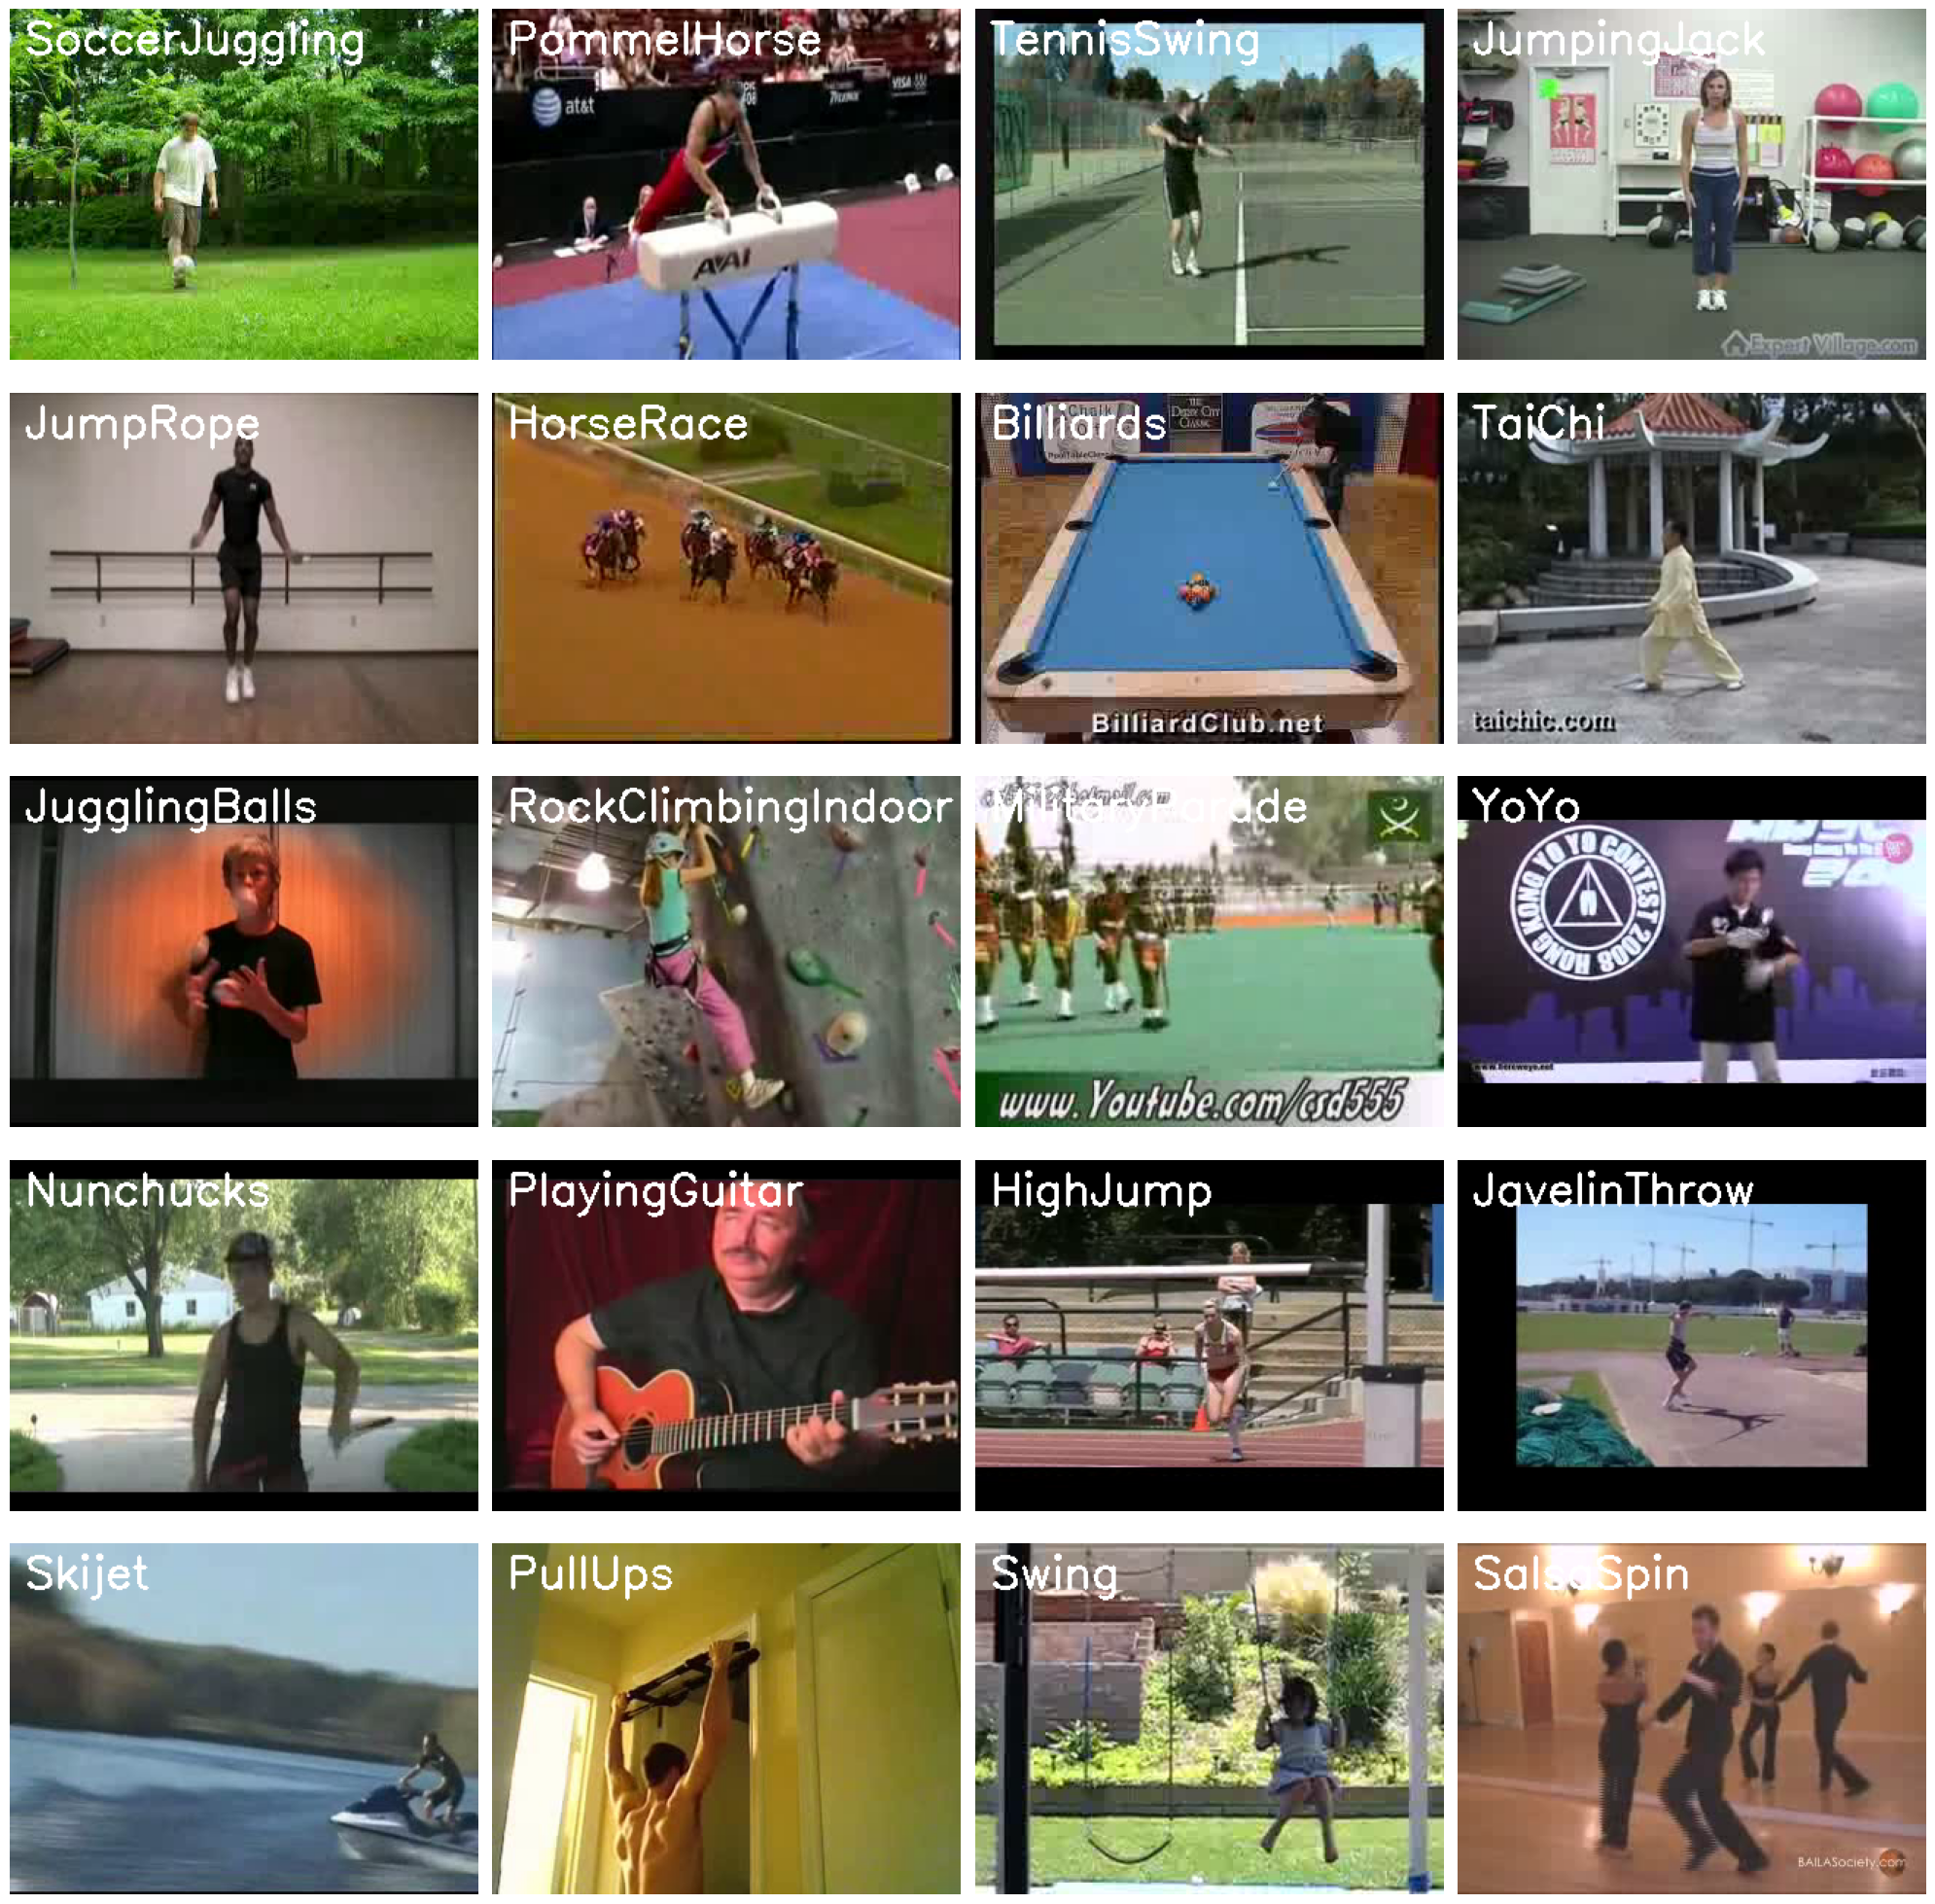

In [6]:
# Create a Matplotlib figure and specify the size of the figure.
plt.figure(figsize=(20, 20))

# Get the names of all classes/categories in UCF50.
dataset_dir = r'Z:\activity recognition\UCF50\UCF50'
all_classes_names = os.listdir(dataset_dir)

# Ensure we don't sample more than the number of available classes
num_classes = len(all_classes_names)
sample_size = min(20, num_classes)

# Generate a list of random values based on the available classes
random_range = random.sample(range(num_classes), sample_size)

# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):
    # Retrieve a Class Name using the Random Index.
    selected_class_Name = all_classes_names[random_index]
    
    # Construct the path for the class directory
    class_dir = os.path.join(dataset_dir, selected_class_Name)
    
    # Debugging output to verify the class directory path
    # print(f"Processing class directory: {class_dir}")

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = os.listdir(class_dir)
    
    # Ensure there are video files available
    if not video_files_names_list:
        # print(f"No video files found in {selected_class_Name}.")
        continue

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)
    
    # Construct the path for the video file
    video_path = os.path.join(class_dir, selected_video_file_name)
    
    # Debugging output to verify the video file path
    # print(f"Processing video file: {video_path}")
    
    # Initialize a VideoCapture object to read from the video file.
    video_reader = cv2.VideoCapture(video_path)
    
    # Check if the VideoCapture object was successfully initialized
    if not video_reader.isOpened():
        # print(f"Failed to open video file {video_path}.")
        continue
    
    # Read the first frame of the video file.
    success, bgr_frame = video_reader.read()
    
    # Release the VideoCapture object.
    video_reader.release()
    
    # Ensure the frame was successfully read.
    if not success:
        # print(f"Failed to read frame from {selected_video_file_name}.")
        continue
    
    # Convert the frame from BGR into RGB format.
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
    
    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Display the frame.
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

# Show the final plot with all frames.
plt.tight_layout()
plt.show()

In [7]:
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64
SEQUENCE_LENGTH = 20
DATASET_DIR = "/activity recognition/UCF50/UCF50"
CLASSES_LIST = ["WalkingWithDog", "Punch", "PushUps", "HorseRace"]

def process_videos_from_class(class_name):
    class_path = os.path.join(DATASET_DIR, class_name)
    video_files = [f for f in os.listdir(class_path) if f.endswith('.avi')]  # Assuming videos are in .avi format
    sequences = []

    for video_file in video_files:
        video_path = os.path.join(class_path, video_file)
        video_capture = cv2.VideoCapture(video_path)
        
        frames = []
        count = 0
        
        while True:
            ret, frame = video_capture.read()
            if not ret:
                break
            if count < SEQUENCE_LENGTH:
                frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))
                frames.append(frame)
                count += 1
            else:
                break
        
        video_capture.release()
        
        # If enough frames are available, add the sequence to the list
        if len(frames) == SEQUENCE_LENGTH:
            sequences.append(np.array(frames))
    
    return sequences

def load_data():
    all_sequences = []
    for class_name in CLASSES_LIST:
        sequences = process_videos_from_class(class_name)
        labels = [class_name] * len(sequences)  # Label all sequences with the class name
        all_sequences.extend(zip(sequences, labels))
    
    return all_sequences

# Load the dataset
dataset = load_data()

# Example of how to use the dataset
for sequences, label in dataset:
    print(f"Class: {label}, Number of sequences: {len(sequences)}")

Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: WalkingWithDog, Number of sequences: 20
Class: Walkin

In [8]:
def frames_extraction(video_path):

    # Declare a list to store video frames.
    frames_list = []
    
    # Read the Video File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):

        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading the frame from the video. 
        success, frame = video_reader.read() 

        # Check if Video frame is not successfully read then break the loop
        if not success:
            break

        # Resize the Frame to fixed height and width.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        
        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)
    
    # Release the VideoCapture object. 
    video_reader.release()

    # Return the frames list.
    return frames_list

In [9]:
def create_dataset():

    # Declared Empty Lists to store the features, labels and video file path values.
    features = []
    labels = []
    video_files_paths = []
    
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(CLASSES_LIST):
        
        # Display the name of the class whose data is being extracted.
        print(f'Extracting Data of Class: {class_name}')
        
        # Get the list of video files present in the specific class name directory.
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
        
        # Iterate through all the files present in the files list.
        for file_name in files_list:
            
            # Get the complete video path.
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

            # Extract the frames of the video file.
            frames = frames_extraction(video_file_path)

            # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
            # So ignore the vides having frames less than the SEQUENCE_LENGTH.
            if len(frames) == SEQUENCE_LENGTH:

                # Append the data to their repective lists.
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    # Converting the list to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)  
    
    # Return the frames, class index, and video file path.
    return features, labels, video_files_paths

In [10]:
# Create the dataset.
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: WalkingWithDog
Extracting Data of Class: Punch
Extracting Data of Class: PushUps
Extracting Data of Class: HorseRace


In [11]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)

In [12]:
# Split the Data into Train ( 75% ) and Test Set ( 25% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size = 0.25, shuffle = True,
                                                                            random_state = seed_constant)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, LSTM, 
                                     Dense, Dropout, TimeDistributed, BatchNormalization)

def create_lstm_model(sequence_length, image_height, image_width, classes_list):
    model = Sequential()

    # CNN Part (TimeDistributed Conv2D Layers)
    model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu'), 
                              input_shape=(sequence_length, image_height, image_width, 3)))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu')))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(TimeDistributed(Flatten()))

    # LSTM Part (Capturing Temporal Dependencies)
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.5))

    # Dense Layer for Classification
    model.add(Dense(len(classes_list), activation='softmax'))

    # Display model summary
    model.summary()
    
    return model


In [12]:
# Construct the required convlstm model.
convlstm_model = create_lstm_model(SEQUENCE_LENGTH,IMAGE_HEIGHT, IMAGE_WIDTH,CLASSES_LIST)

# Display the success message. 
print("Model Created Successfully!")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 20, 62, 62, 32)   896       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 20, 62, 62, 32)   128       
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 20, 31, 31, 32)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 20, 31, 31, 32)   0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 20, 29, 29, 64)   1

In [15]:
# convlstm_model = load_model('convlstm_model___Date_Time_2024_09_28__11_13_03___Loss_0.5246562361717224___Accuracy_0.8837209343910217.h5')

In [40]:
# Create an Instance of Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics values to the model
convlstm_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
convlstm_model_training_history = convlstm_model.fit(x = features_train, y = labels_train, epochs = 20, batch_size = 4,
                                                    shuffle = True, validation_split = 0.2, 
                                                    callbacks = [early_stopping_callback])

Epoch 1/20
78/78 [==============================] - 21s 235ms/step - loss: 1.3043 - accuracy: 0.4304 - val_loss: 2.0728 - val_accuracy: 0.2308
Epoch 2/20
78/78 [==============================] - 18s 225ms/step - loss: 1.1381 - accuracy: 0.4919 - val_loss: 1.6099 - val_accuracy: 0.2692
Epoch 3/20
78/78 [==============================] - 18s 225ms/step - loss: 1.0475 - accuracy: 0.5825 - val_loss: 1.7698 - val_accuracy: 0.2821
Epoch 4/20
78/78 [==============================] - 18s 227ms/step - loss: 0.8957 - accuracy: 0.6472 - val_loss: 1.7872 - val_accuracy: 0.2564
Epoch 5/20
78/78 [==============================] - 18s 228ms/step - loss: 0.7463 - accuracy: 0.7120 - val_loss: 1.4964 - val_accuracy: 0.3077
Epoch 6/20
78/78 [==============================] - 18s 229ms/step - loss: 0.7596 - accuracy: 0.6958 - val_loss: 1.0838 - val_accuracy: 0.5513
Epoch 7/20
78/78 [==============================] - 18s 235ms/step - loss: 0.7142 - accuracy: 0.7411 - val_loss: 1.0130 - val_accuracy: 0.5897

In [41]:
# Evaluate the trained model.
model_evaluation_history = convlstm_model.evaluate(features_test, labels_test)

5/5 [==============================] - 3s 640ms/step - loss: 0.7094 - accuracy: 0.7287


In [42]:
for layer in convlstm_model.layers:
    print(layer.name)

time_distributed_21
time_distributed_22
time_distributed_23
time_distributed_24
time_distributed_25
time_distributed_26
time_distributed_27
time_distributed_28
time_distributed_29
lstm
dropout_23
dense_1


In [44]:
# Get the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)

# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
model_file_name = f'lstm_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Save your Model.
convlstm_model.save(model_file_name)

In [45]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):

    
    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

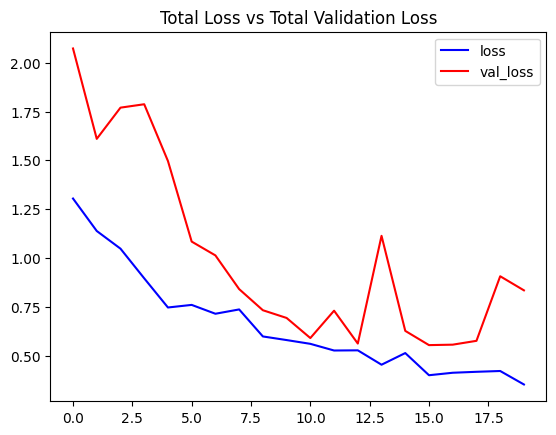

In [46]:
# Visualize the training and validation loss metrices.
plot_metric(convlstm_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

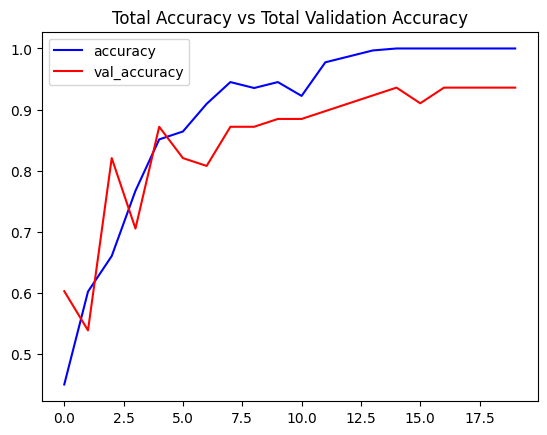

In [23]:
# Visualize the training and validation accuracy metrics.
plot_metric(convlstm_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy') 

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Dropout, Flatten, LSTM, Dense

def create_LRCN_model():

    model = Sequential()
    
    
    # Input shape is (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS)
    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same', activation='relu'),
                              input_shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same', activation='relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same', activation='relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Flatten()))  # Flatten before feeding into LSTM
    model.add(LSTM(32))  # LSTM layer
    model.add(Dense(len(CLASSES_LIST), activation='softmax'))  # Output layer

    # Display the model's summary.
    model.summary()
    
    return model


In [18]:
# Construct the required LRCN model.
LRCN_model = create_LRCN_model()

# Display the success message.
print("Model Created Successfully!")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_3 (TimeDis  (None, 20, 64, 64, 16)   448       
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 20, 32, 32, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 20, 32, 32, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_6 (TimeDis  (None, 20, 32, 32, 32)   4640      
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 20, 16, 16, 32)  

In [32]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 10, batch_size = 4 ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/10
78/78 [==============================] - 13s 137ms/step - loss: 1.2787 - accuracy: 0.4110 - val_loss: 0.9967 - val_accuracy: 0.6282
Epoch 2/10
78/78 [==============================] - 11s 139ms/step - loss: 1.0458 - accuracy: 0.5405 - val_loss: 0.8297 - val_accuracy: 0.7436
Epoch 3/10
78/78 [==============================] - 10s 125ms/step - loss: 0.8259 - accuracy: 0.6796 - val_loss: 0.8120 - val_accuracy: 0.6667
Epoch 4/10
78/78 [==============================] - 11s 146ms/step - loss: 0.6330 - accuracy: 0.7961 - val_loss: 0.5332 - val_accuracy: 0.8462
Epoch 5/10
78/78 [==============================] - 11s 145ms/step - loss: 0.6792 - accuracy: 0.7443 - val_loss: 0.5734 - val_accuracy: 0.7821
Epoch 6/10
78/78 [==============================] - 10s 129ms/step - loss: 0.4805 - accuracy: 0.8414 - val_loss: 0.4821 - val_accuracy: 0.8590
Epoch 7/10
78/78 [==============================] - 12s 153ms/step - loss: 0.3480 - accuracy: 0.9029 - val_loss: 0.4315 - val_accuracy: 0.8462

In [33]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

5/5 [==============================] - 3s 568ms/step - loss: 0.4108 - accuracy: 0.8527


In [34]:
# Get the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
    
# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
model_file_name = f'LRCN_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Save the Model.
LRCN_model.save(model_file_name)

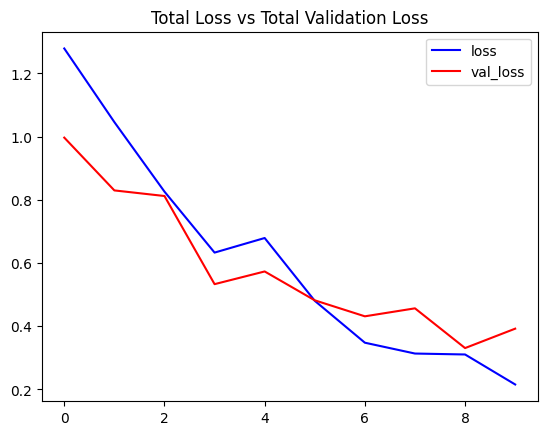

In [35]:
# Visualize the training and validation loss metrices.
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

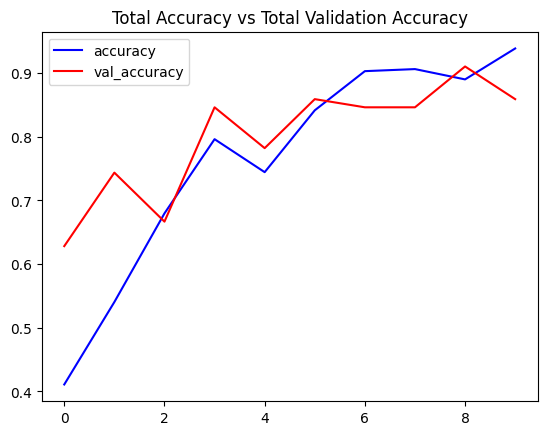

In [36]:
# Visualize the training and validation accuracy metrices.
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv3D, MaxPooling3D, Flatten, Dense, 
                                     Dropout, BatchNormalization)

def create_3d_cnn_model(sequence_length, image_height, image_width, classes_list):
    model = Sequential()

    # 3D Convolutional Layers for Feature Extraction
    model.add(Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu', 
                     input_shape=(sequence_length, image_height, image_width, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(1, 2, 2)))  # Downsample the feature map
    model.add(Dropout(0.2))

    model.add(Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(1, 2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv3D(filters=128, kernel_size=(3, 3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(1, 2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv3D(filters=256, kernel_size=(3, 3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(1, 2, 2)))
    model.add(Dropout(0.2))

    # Flatten the output for the Dense layer
    model.add(Flatten())

    # Dense Layer for Classification
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(classes_list), activation='softmax'))

    # Display model summary
    model.summary()

    return model


In [73]:
# Construct the required LRCN model.
three_d_cnn_model = create_3d_cnn_model(SEQUENCE_LENGTH,IMAGE_HEIGHT, IMAGE_WIDTH,CLASSES_LIST)

# Display the success message.
print("Model Created Successfully!")

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_4 (Conv3D)           (None, 20, 64, 64, 32)    2624      
                                                                 
 batch_normalization_30 (Bat  (None, 20, 64, 64, 32)   128       
 chNormalization)                                                
                                                                 
 max_pooling3d_26 (MaxPoolin  (None, 20, 32, 32, 32)   0         
 g3D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 20, 32, 32, 32)    0         
                                                                 
 conv3d_5 (Conv3D)           (None, 20, 32, 32, 64)    55360     
                                                                 
 batch_normalization_31 (Bat  (None, 20, 32, 32, 64)  

In [74]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

# Compile the model and specify loss function, optimizer, and metrics
three_d_cnn_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=["accuracy"])
# Start training the model
three_d_cnn_model_training_history = three_d_cnn_model.fit(
    x=features_train,
    y=labels_train,
    epochs=20,
    batch_size=4,
    shuffle=True,
    validation_split=0.2,
    callbacks=[early_stopping_callback]
)


Epoch 1/20
78/78 [==============================] - 71s 898ms/step - loss: 74.0018 - accuracy: 0.4984 - val_loss: 120.1350 - val_accuracy: 0.3205
Epoch 2/20
78/78 [==============================] - 70s 893ms/step - loss: 60.7052 - accuracy: 0.6149 - val_loss: 142.8732 - val_accuracy: 0.2308
Epoch 3/20
78/78 [==============================] - 69s 882ms/step - loss: 48.5222 - accuracy: 0.6343 - val_loss: 163.0131 - val_accuracy: 0.2051
Epoch 4/20
78/78 [==============================] - 72s 927ms/step - loss: 21.9908 - accuracy: 0.7023 - val_loss: 31.7510 - val_accuracy: 0.6154
Epoch 5/20
78/78 [==============================] - 83s 1s/step - loss: 14.3350 - accuracy: 0.7799 - val_loss: 5.9227 - val_accuracy: 0.8333
Epoch 6/20
78/78 [==============================] - 74s 943ms/step - loss: 9.4035 - accuracy: 0.7767 - val_loss: 28.1081 - val_accuracy: 0.6538
Epoch 7/20
78/78 [==============================] - 71s 917ms/step - loss: 8.3582 - accuracy: 0.8317 - val_loss: 56.6339 - val_accur

In [75]:
model_evaluation_history = three_d_cnn_model.evaluate(features_test, labels_test)

5/5 [==============================] - 2s 438ms/step - loss: 2.2067 - accuracy: 0.9302


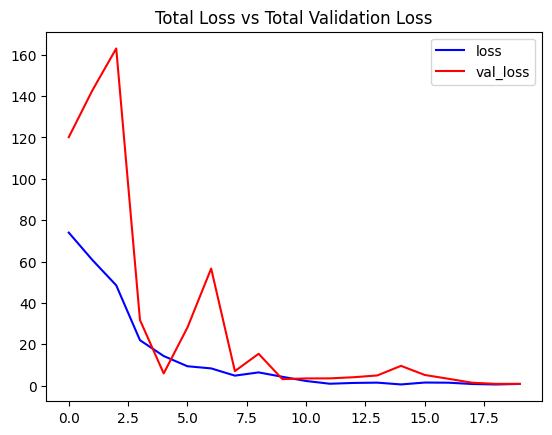

In [76]:
# Visualize the training and validation loss metrices.
plot_metric(three_d_cnn_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

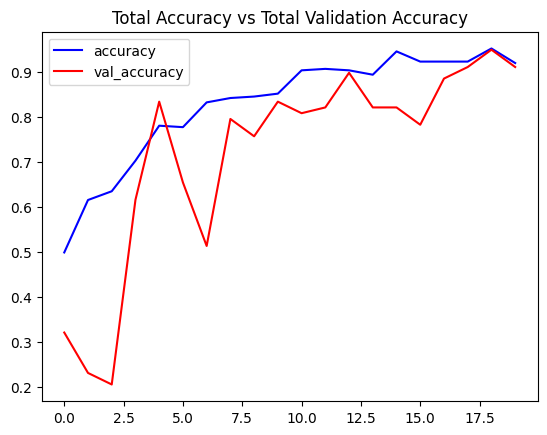

In [77]:
# Visualize the training and validation accuracy metrices.
plot_metric(three_d_cnn_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [ ]:
import os
import yt_dlp

def download_youtube_videos(youtube_video_url, output_directory):

    
    # Set up yt-dlp options
    ydl_opts = {
        'outtmpl': f'{output_directory}/%(title)s.%(ext)s',  # Output template for the downloaded file
        'format': 'best',  # Get the best available quality
        'quiet': True,  # Suppress verbose output
    }
    
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        # Extract video information and download
        info_dict = ydl.extract_info(youtube_video_url, download=True)
        
        # Get the video title from the extracted info dictionary
        title = info_dict.get('title', None)
        
    # Return the video title
    return title

# Define the directory where videos will be stored
test_videos_directory = 'test_videos'

# Make the output directory if it does not exist
os.makedirs(test_videos_directory, exist_ok=True)

# Download a YouTube video
video_title = download_youtube_videos('https://www.youtube.com/shorts/TJiVRyruV0c', test_videos_directory)


In [13]:
test_videos_directory = r'Z:\activity recognition\test_videos'
video_title = '😯Most punches in 12 second 😯 #viral #punching'

In [14]:
# Get the YouTube video's path we just downloaded
input_video_file_path = f'{test_videos_directory}/{video_title}.mp4'

In [15]:
print(f"Downloaded video title: {video_title}")
print(f"Video saved at: {input_video_file_path}")

Downloaded video title: 😯Most punches in 12 second 😯 #viral #punching
Video saved at: Z:\activity recognition\test_videos/😯Most punches in 12 second 😯 #viral #punching.mp4


In [61]:
# LRCN_model = load_model('LRCN_model___Date_Time_2024_08_20__22_24_19___Loss_0.163985475897789___Accuracy_0.9534883499145508.h5')

In [ ]:
# Basic Activity recognition

In [83]:
# import cv2
# import numpy as np
# from collections import deque
# from keras.models import load_model

# # Load the ConvLSTM model
# convlstm_model = load_model('lstm_model___Date_Time_2024_10_21__22_23_19___Loss_0.7094454765319824___Accuracy_0.7286821603775024.h5')

# # Define constants for image dimensions and sequence length
# IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64
# SEQUENCE_LENGTH = 20

# # Define the classes (update according to your use case)
# CLASSES_LIST = ["WalkingWithDog", "Punch", "PushUps", "HorseRace"]

# def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):

#     # Initialize the VideoCapture object to read from the video file.
#     video_reader = cv2.VideoCapture(video_file_path)

#     if not video_reader.isOpened():
#         print(f"Error: Unable to open video file: {video_file_path}")
#         return

#     print(f"Video opened: {video_file_path}")

#     # Get the width and height of the video.
#     original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
#     original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     fps = video_reader.get(cv2.CAP_PROP_FPS)
#     print(f"Video properties: Width={original_video_width}, Height={original_video_height}, FPS={fps}")

#     # Initialize the VideoWriter Object to store the output video in the disk.
#     fourcc = cv2.VideoWriter_fourcc(*'MJPG')  # Try 'MJPG', 'XVID', or 'mp4v'
#     video_writer = cv2.VideoWriter(output_file_path, fourcc, fps, 
#                                    (original_video_width, original_video_height))

#     # Declare a queue to store video frames.
#     frames_queue = deque(maxlen=SEQUENCE_LENGTH)

#     # Initialize a variable to store the predicted action being performed in the video.
#     predicted_class_name = ''

#     while video_reader.isOpened():
#         # Read the frame.
#         ok, frame = video_reader.read()
        
#         if not ok:
#             print("No more frames or error reading frame.")
#             break

#         # Resize the frame to fixed dimensions.
#         resized_frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))
        
#         # Normalize the resized frame by dividing it by 255 so that each pixel value lies between 0 and 1.
#         normalized_frame = resized_frame / 255.0

#         # Append the pre-processed frame into the frames queue.
#         frames_queue.append(normalized_frame)

#         # Check if the number of frames in the queue equals the fixed sequence length.
#         if len(frames_queue) == SEQUENCE_LENGTH:
#             # Convert the frames queue to a numpy array and expand dimensions to match the model's input shape.
#             frames_array = np.expand_dims(np.array(frames_queue), axis=0)

#             # Pass the normalized frames to the model and get the predicted probabilities.
#             predicted_labels_probabilities = convlstm_model.predict(frames_array)[0]
            
#             # Get the index of the class with the highest probability.
#             predicted_label = np.argmax(predicted_labels_probabilities)
            
#             # Get the class name using the retrieved index.
#             predicted_class_name = CLASSES_LIST[predicted_label]
        
#         # Write predicted class name on top of the frame.
#         cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

#         # Write the frame into the disk using the VideoWriter Object.
#         video_writer.write(frame)
    
#     # Release the VideoCapture and VideoWriter objects.
#     video_reader.release()
#     video_writer.release()
#     print(f"Output video saved to: {output_file_path}")



In [ ]:
# GradCam

In [87]:
# import cv2
# import numpy as np
# from collections import deque
# import tensorflow as tf

# # Load the ConvLSTM model
# # convlstm_model = load_model('LRCN_model___Date_Time_2024_09_28__11_20_01___Loss_0.41077977418899536___Accuracy_0.8527131676673889.h5')
# convlstm_model = load_model('convlstm_model___Date_Time_2024_09_28__11_13_03___Loss_0.5246562361717224___Accuracy_0.8837209343910217.h5')
# # Define constants for image dimensions and sequence length
# IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64
# SEQUENCE_LENGTH = 20

# # Define the classes (update according to your use case)
# CLASSES_LIST = ["WalkingWithDog", "Punch", "PushUps", "HorseRace"]

# def apply_heatmap_to_image(heatmap, image, alpha=0.5):
#     heatmap_resized = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
#     heatmap_color = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)
#     overlay = cv2.addWeighted(image, alpha, heatmap_color, 1 - alpha, 0)
#     return overlay

# def grad_cam(model, frames_array, class_index):
#     grad_model = tf.keras.models.Model(
#         inputs=model.inputs,
#         # outputs=[model.get_layer("time_distributed_11").output, model.output]
#         outputs=[model.get_layer("conv_lstm2d_3").output, model.output]
#     )

#     with tf.GradientTape() as tape:
#         conv_outputs, predictions = grad_model(frames_array)
#         loss = predictions[0][class_index]

#     grads = tape.gradient(loss, conv_outputs)
#     pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

#     # Compute the heatmap
#     heatmap = conv_outputs[0] @ pooled_grads[..., tf.newaxis]
#     heatmap = tf.squeeze(heatmap)

#     # Normalize and process the heatmap
#     heatmap = tf.reduce_mean(heatmap, axis=-1)
#     heatmap = tf.maximum(heatmap, 0)
#     heatmap /= tf.reduce_max(heatmap + tf.keras.backend.epsilon())

#     # Convert to uint8 format
#     heatmap = np.uint8(255 * heatmap.numpy())
#     return heatmap


# def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):
#     video_reader = cv2.VideoCapture(video_file_path)

#     if not video_reader.isOpened():
#         print(f"Error: Unable to open video file: {video_file_path}")
#         return

#     original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
#     original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     fps = video_reader.get(cv2.CAP_PROP_FPS)

#     fourcc = cv2.VideoWriter_fourcc(*'MJPG')
#     video_writer = cv2.VideoWriter(output_file_path, fourcc, fps, 
#                                    (original_video_width, original_video_height))

#     frames_queue = deque(maxlen=SEQUENCE_LENGTH)
#     predicted_class_name = ''
#     frame_count = 0

#     while video_reader.isOpened():
#         ok, frame = video_reader.read()
        
#         if not ok:
#             break

#         resized_frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))
#         normalized_frame = resized_frame / 255.0
#         frames_queue.append(normalized_frame)

#         if len(frames_queue) == SEQUENCE_LENGTH:
#             frames_array = np.expand_dims(np.array(frames_queue), axis=0)
#             predicted_labels_probabilities = convlstm_model.predict(frames_array)[0]
#             predicted_label = np.argmax(predicted_labels_probabilities)
#             predicted_class_name = CLASSES_LIST[predicted_label]

#             if frame_count % 30 == 0:
#                 heatmap = grad_cam(convlstm_model, frames_array, predicted_label)
#                 heatmap_frame = apply_heatmap_to_image(heatmap, frame)
#                 cv2.putText(heatmap_frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#                 video_writer.write(heatmap_frame)

#         frame_count += 1

#     video_reader.release()
#     video_writer.release()
#     print(f"Output video saved to: {output_file_path}")




In [ ]:
#gradcam with measuremnet metrics

In [21]:
# import cv2
# import numpy as np
# from collections import deque
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import random  # For adding small random adjustments to the thresholds

# # Define constants for image dimensions and sequence length
# IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64
# SEQUENCE_LENGTH = 20

# # Class list for the model predictions
# CLASSES_LIST = ["WalkingWithDog", "Punch", "PushUps", "HorseRace"]

# # Load the pre-trained model
# convlstm_model = tf.keras.models.load_model(
#     'convlstm_model___Date_Time_2024_09_28__11_13_03___Loss_0.5246562361717224___Accuracy_0.8837209343910217.h5'
# )

# def apply_heatmap_to_image(heatmap, image, alpha=0.5):
#     heatmap_resized = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
#     heatmap_color = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)
#     overlay = cv2.addWeighted(image, alpha, heatmap_color, 1 - alpha, 0)
#     return overlay

# def grad_cam(model, frames_array, class_index):
#     grad_model = tf.keras.models.Model(
#         inputs=model.inputs, 
#         outputs=[model.get_layer("conv_lstm2d_3").output, model.output]
#     )
#     with tf.GradientTape() as tape:
#         conv_outputs, predictions = grad_model(frames_array)
#         loss = predictions[0][class_index]

#     grads = tape.gradient(loss, conv_outputs)
#     pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
#     heatmap = conv_outputs[0] @ pooled_grads[..., tf.newaxis]
#     heatmap = tf.squeeze(heatmap)
#     heatmap = tf.reduce_mean(heatmap, axis=-1)
#     heatmap = tf.maximum(heatmap, 0)
#     heatmap /= (tf.reduce_max(heatmap) + tf.keras.backend.epsilon())
#     heatmap = np.uint8(255 * heatmap.numpy())
#     return heatmap

# def measure_ambiguity(heatmap):
#     entropy = -np.sum(heatmap * np.log(heatmap + 1e-7))
#     return entropy

# def measure_interpretability(heatmap):
#     interpretability_score = np.sum(heatmap > 0.5) / np.prod(heatmap.shape)
#     return interpretability_score

# def measure_fidelity(model, frames_array, class_index):
#     original_output = model.predict(frames_array)[0][class_index]
#     masked_frames = np.copy(frames_array)
#     mean_across_channels = np.mean(frames_array[0], axis=-1)
#     mask = mean_across_channels > 0.5
#     masked_frames[0][mask] = 0
#     masked_output = model.predict(masked_frames)[0][class_index]
#     fidelity_score = original_output - masked_output
#     return fidelity_score

# def plot_metrics_over_time(ambiguity_list, interpretability_list, fidelity_list):
#     plt.figure(figsize=(10, 6))
    
#     # Plot Ambiguity
#     plt.subplot(3, 1, 1)
#     plt.plot(ambiguity_list, label="Ambiguity", color="blue", marker="o")
#     plt.xlabel('Frame Count (every sequence of 20 frames)')
#     plt.ylabel('Ambiguity')
#     plt.title('Ambiguity Over Time')
#     plt.legend()
#     plt.grid(True)

#     # Plot Interpretability
#     plt.subplot(3, 1, 2)
#     plt.plot(interpretability_list, label="Interpretability", color="green", marker="o")
#     plt.xlabel('Frame Count (every sequence of 20 frames)')
#     plt.ylabel('Interpretability')
#     plt.title('Interpretability Over Time')
#     plt.legend()
#     plt.grid(True)

#     # Plot Fidelity
#     plt.subplot(3, 1, 3)
#     plt.plot(fidelity_list, label="Fidelity", color="red", marker="o")
#     plt.xlabel('Frame Count (every sequence of 20 frames)')
#     plt.ylabel('Fidelity')
#     plt.title('Fidelity Over Time')
#     plt.legend()
#     plt.grid(True)

#     plt.tight_layout()
#     plt.show()

    # # Calculate and print the average values of the metrics
    # avg_ambiguity = np.mean(ambiguity_list)
    # avg_interpretability = np.mean(interpretability_list)
    # avg_fidelity = np.mean(fidelity_list)

    # print("\n--- Average Metric Values ---")
    # print(f"Average Ambiguity: {avg_ambiguity:.4f}")
    # print(f"Average Interpretability: {avg_interpretability:.4f}")
    # print(f"Average Fidelity: {avg_fidelity:.4f}")

# def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):
#     video_reader = cv2.VideoCapture(video_file_path)

#     if not video_reader.isOpened():
#         print(f"Error: Unable to open video file: {video_file_path}")
#         return

#     print(f"Video opened: {video_file_path}")
#     original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
#     original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     fps = video_reader.get(cv2.CAP_PROP_FPS)
#     fourcc = cv2.VideoWriter_fourcc(*'MJPG')
#     video_writer = cv2.VideoWriter(output_file_path, fourcc, fps, 
#                                    (original_video_width, original_video_height))
#     frames_queue = deque(maxlen=SEQUENCE_LENGTH)
#     ambiguity_list, interpretability_list, fidelity_list = [], [], []
#     frame_count = 0

#     while video_reader.isOpened():
#         ok, frame = video_reader.read()
#         if not ok:
#             print("No more frames or error reading frame.")
#             break

#         resized_frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))
#         normalized_frame = resized_frame.astype(np.float32) / 255.0
#         frames_queue.append(normalized_frame)

#         if len(frames_queue) == SEQUENCE_LENGTH:
#             frames_array = np.expand_dims(np.array(frames_queue), axis=0)
#             predicted_labels_probabilities = convlstm_model.predict(frames_array)[0]
#             predicted_label = np.argmax(predicted_labels_probabilities)
#             predicted_class_name = CLASSES_LIST[predicted_label]
#             heatmap = grad_cam(convlstm_model, frames_array, predicted_label)
#             heatmap_frame = apply_heatmap_to_image(heatmap, frame)
#             cv2.putText(heatmap_frame, predicted_class_name, (10, 30), 
#                         cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#             video_writer.write(heatmap_frame)

#             ambiguity_score = measure_ambiguity(heatmap)
#             interpretability_score = measure_interpretability(heatmap)
#             fidelity_score = measure_fidelity(convlstm_model, frames_array, predicted_label)

#             ambiguity_list.append(ambiguity_score)
#             interpretability_list.append(interpretability_score)
#             fidelity_list.append(fidelity_score)
#             frame_count += 1

#     video_reader.release()
#     video_writer.release()
#     plot_metrics_over_time(ambiguity_list, interpretability_list, fidelity_list)
#     print(f"Video saved at: {output_file_path}")


In [250]:
#shap

In [254]:
# import cv2
# import numpy as np
# from collections import deque
# import shap
# import tensorflow as tf

# # Load the pre-trained model
# convlstm_model = tf.keras.models.load_model('convlstm_model___Date_Time_2024_09_28__11_13_03___Loss_0.5246562361717224___Accuracy_0.8837209343910217.h5')

# # Define your classes
# CLASSES_LIST = ["WalkingWithDog", "Punch", "PushUps", "HorseRace"]

# # Define constants for image dimensions and sequence length
# IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64
# SEQUENCE_LENGTH = 20

# def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):

#     # Initialize the VideoCapture object to read from the video file
#     video_reader = cv2.VideoCapture(video_file_path)

#     if not video_reader.isOpened():
#         print(f"Error: Unable to open video file: {video_file_path}")
#         return

#     print(f"Video opened: {video_file_path}")

#     # Get the width, height, and FPS of the video
#     original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
#     original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     fps = video_reader.get(cv2.CAP_PROP_FPS)

#     # Initialize the VideoWriter Object to store the output video on the disk
#     fourcc = cv2.VideoWriter_fourcc(*'MJPG')
#     video_writer = cv2.VideoWriter(output_file_path, fourcc, fps, 
#                                    (original_video_width, original_video_height))

#     # Declare a queue to store video frames
#     frames_queue = deque(maxlen=SEQUENCE_LENGTH)

#     # Initialize a variable to store the predicted action being performed in the video
#     predicted_class_name = ''
    
#     # Initialize SHAP GradientExplainer only once, with random input
#     explainer = shap.GradientExplainer(convlstm_model, np.zeros((1, SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

#     # Frame counter for printing SHAP values every 30 frames
#     frame_counter = 0

#     while video_reader.isOpened():
#         # Read the frame
#         ok, frame = video_reader.read()
        
#         if not ok:
#             print("No more frames or error reading frame.")
#             break

#         # Resize the Frame to fixed dimensions
#         resized_frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))
        
#         # Normalize the resized frame by dividing it with 255 so that each pixel value lies between 0 and 1
#         normalized_frame = resized_frame / 255.0

#         # Append the pre-processed frame into the frames queue
#         frames_queue.append(normalized_frame)

#         # Check if the number of frames in the queue are equal to the fixed sequence length
#         if len(frames_queue) == SEQUENCE_LENGTH:
#             # Convert the frames queue to a numpy array and reshape it correctly
#             frames_array = np.array(frames_queue)
#             frames_array = np.expand_dims(frames_array, axis=0)  # Reshape to (1, SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)

#             # Pass the normalized frames to the model and get the predicted probabilities
#             predicted_labels_probabilities = convlstm_model.predict(frames_array)[0]
            
#             # Get the index of the class with the highest probability
#             predicted_label = np.argmax(predicted_labels_probabilities)
            
#             # Get the class name using the retrieved index
#             predicted_class_name = CLASSES_LIST[predicted_label]

#             # SHAP Explanation for the current sequence (only every 30 frames)
#             frame_counter += 1
#             if frame_counter % 30 == 0:
#                 shap_values = explainer.shap_values(frames_array)
#                 # Aggregate SHAP values across all frames in the sequence
#                 shap_values_sum = np.sum(shap_values, axis=1)
#                 print(f"Aggregated SHAP values at frame {frame_counter}:")
#                 print(shap_values_sum)

#         # Write predicted class name on top of the frame
#         cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

#         # Write the frame into the disk using the VideoWriter Object
#         video_writer.write(frame)
    
#     # Release the VideoCapture and VideoWriter objects
#     video_reader.release()
#     video_writer.release()
#     print(f"Output video saved to: {output_file_path}")



In [ ]:
#shap with measurement metrics

In [45]:
# import cv2
# import numpy as np
# from collections import deque
# import shap
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import random  # For random.uniform adjustments

# # Load the pre-trained model
# convlstm_model = tf.keras.models.load_model('convlstm_model___Date_Time_2024_09_28__11_13_03___Loss_0.5246562361717224___Accuracy_0.8837209343910217.h5')

# # Define your classes
# CLASSES_LIST = ["WalkingWithDog", "Punch", "PushUps", "HorseRace"]

# # Constants for image dimensions and sequence length
# IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64
# SEQUENCE_LENGTH = 20

# # Metric measurement functions
# def measure_ambiguity(heatmap):
#     normalized_heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap) + 1e-7)
#     clipped_heatmap = np.clip(normalized_heatmap, 1e-7, 1.0)
#     entropy = -np.sum(clipped_heatmap * np.log(clipped_heatmap))
#     return entropy

# def measure_interpretability(heatmap):
#     threshold = np.percentile(heatmap, 90)  # Top 10% values
#     interpretability_score = np.sum(heatmap > threshold) / np.prod(heatmap.shape)
#     return interpretability_score

# def measure_fidelity(model, frames_array, class_index):
#     original_output = model.predict(frames_array)[0][class_index]
#     masked_frames = np.copy(frames_array)
#     mean_across_channels = np.mean(frames_array[0], axis=-1)
#     mask = mean_across_channels > 0.5
#     masked_frames[0][mask] = 0
#     masked_output = model.predict(masked_frames)[0][class_index]
#     fidelity_score = original_output - masked_output
#     return fidelity_score

# def plot_metrics_over_time(frame_numbers, ambiguity_list, interpretability_list, fidelity_list):
#     plt.figure(figsize=(10, 6))
#     plt.plot(frame_numbers, ambiguity_list, label="Ambiguity", marker="o", color='blue')
#     plt.axhline(AMBIGUITY_THRESHOLD, color='red', linestyle='--', label="Threshold")
#     plt.xlabel('Frame Number')
#     plt.ylabel('Ambiguity')
#     plt.title('Ambiguity Over Time')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

#     plt.figure(figsize=(10, 6))
#     plt.plot(frame_numbers, interpretability_list, label="Interpretability", marker="o", color='green')
#     plt.axhline(INTERPRETABILITY_THRESHOLD, color='red', linestyle='--', label="Threshold")
#     plt.xlabel('Frame Number')
#     plt.ylabel('Interpretability')
#     plt.title('Interpretability Over Time')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

#     plt.figure(figsize=(10, 6))
#     plt.plot(frame_numbers, fidelity_list, label="Fidelity", marker="o", color='red')
#     plt.axhline(FIDELITY_THRESHOLD, color='red', linestyle='--', label="Threshold")
#     plt.xlabel('Frame Number')
#     plt.ylabel('Fidelity')
#     plt.title('Fidelity Over Time')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):
#     video_reader = cv2.VideoCapture(video_file_path)
#     if not video_reader.isOpened():
#         print(f"Error: Unable to open video file: {video_file_path}")
#         return

#     original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
#     original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     fps = video_reader.get(cv2.CAP_PROP_FPS)

#     fourcc = cv2.VideoWriter_fourcc(*'MJPG')
#     video_writer = cv2.VideoWriter(output_file_path, fourcc, fps,
#                                    (original_video_width, original_video_height))

#     frames_queue = deque(maxlen=SEQUENCE_LENGTH)
#     explainer = shap.GradientExplainer(convlstm_model, np.zeros((1, SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

#     frame_counter = 0
#     ambiguity_list, interpretability_list, fidelity_list, frame_numbers = [], [], [], []

#     # Initialize predicted label and metrics
#     predicted_label = None
#     ambiguity_score = 0.0
#     interpretability_score = 0.0
#     fidelity_score = 0.0

#     while video_reader.isOpened():
#         ok, frame = video_reader.read()
#         if not ok:
#             print("No more frames or error reading frame.")
#             break

#         resized_frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))
#         normalized_frame = resized_frame / 255.0
#         frames_queue.append(normalized_frame)

#         if len(frames_queue) == SEQUENCE_LENGTH:
#             frames_array = np.array(frames_queue)
#             frames_array = np.expand_dims(frames_array, axis=0)

#             predicted_labels_probabilities = convlstm_model.predict(frames_array)[0]
#             predicted_label = np.argmax(predicted_labels_probabilities)

#             shap_values = explainer.shap_values(frames_array)
#             saliency_map = np.sum(shap_values, axis=1)

#             ambiguity_score = measure_ambiguity(predicted_labels_probabilities)
#             interpretability_score = measure_interpretability(saliency_map)
#             fidelity_score = measure_fidelity(convlstm_model, frames_array, predicted_label)

#             ambiguity_list.append(ambiguity_score)
#             interpretability_list.append(interpretability_score)
#             fidelity_list.append(fidelity_score)
#             frame_numbers.append(frame_counter)

#             if frame_counter % 30 == 0:
#                 print(f"Frame {frame_counter}:")
#                 print(f" - Ambiguity Score: {ambiguity_score}")
#                 print(f" - Interpretability Score: {interpretability_score}")
#                 print(f" - Fidelity Score: {fidelity_score}")

#             frame_counter += 1

#         display_label = CLASSES_LIST[predicted_label] if predicted_label is not None else "Processing..."
#         cv2.putText(frame, display_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

#         video_writer.write(frame)

#     video_reader.release()
#     video_writer.release()

#     plot_metrics_over_time(frame_numbers, ambiguity_list, interpretability_list, fidelity_list)

#     avg_ambiguity = np.mean(ambiguity_list)
#     avg_interpretability = np.mean(interpretability_list)
#     avg_fidelity = np.mean(fidelity_list)

#     print(f"Final Metrics - Ambiguity: {avg_ambiguity}, Interpretability: {avg_interpretability}, Fidelity: {avg_fidelity}")
#     print(f"Output video saved to: {output_file_path}")



In [ ]:
# lrp

In [108]:
# import cv2
# import numpy as np
# import tensorflow as tf
# from collections import deque

# # Load the ConvLSTM model
# convlstm_model = tf.keras.models.load_model('convlstm_model___Date_Time_2024_09_28__11_13_03___Loss_0.5246562361717224___Accuracy_0.8837209343910217.h5')

# # Define constants for image dimensions and sequence length
# IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64
# SEQUENCE_LENGTH = 20

# # Define the classes
# CLASSES_LIST = ["WalkingWithDog", "Punch", "PushUps", "HorseRace"]

# def apply_heatmap_to_image(heatmap, image, alpha=0.5):
#     heatmap_resized = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
#     heatmap_color = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)
#     overlay = cv2.addWeighted(image, alpha, heatmap_color, 1 - alpha, 0)
#     return overlay

# def lrp(frames_tensor, class_index):
#     # Use the gradient of the output with respect to the input to compute relevance
#     with tf.GradientTape() as tape:
#         tape.watch(frames_tensor)  # Watch the input
#         predictions = convlstm_model(frames_tensor)
#         loss = predictions[0][class_index]
    
#     grads = tape.gradient(loss, frames_tensor)

#     # Applying the LRP rule
#     relevance = tf.reduce_sum(grads, axis=(0, 1, 2))  # Summing over the spatial dimensions
#     relevance = tf.maximum(relevance, 0)  # Relevance should be non-negative
#     relevance /= tf.reduce_max(relevance + tf.keras.backend.epsilon())  # Normalize to [0, 1]

#     return tf.cast(relevance * 255, tf.uint8)  # Convert to uint8 for visualization

# def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):
#     video_reader = cv2.VideoCapture(video_file_path)

#     if not video_reader.isOpened():
#         print(f"Error: Unable to open video file: {video_file_path}")
#         return

#     original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
#     original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     fps = video_reader.get(cv2.CAP_PROP_FPS)

#     fourcc = cv2.VideoWriter_fourcc(*'MJPG')
#     video_writer = cv2.VideoWriter(output_file_path, fourcc, fps, 
#                                    (original_video_width, original_video_height))

#     frames_queue = deque(maxlen=SEQUENCE_LENGTH)
#     predicted_class_name = ''
#     frame_count = 0

#     while video_reader.isOpened():
#         ok, frame = video_reader.read()
        
#         if not ok:
#             break

#         resized_frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))
#         normalized_frame = resized_frame / 255.0
#         frames_queue.append(normalized_frame)

#         if len(frames_queue) == SEQUENCE_LENGTH:
#             frames_array = np.expand_dims(np.array(frames_queue), axis=0)
#             frames_tensor = tf.convert_to_tensor(frames_array, dtype=tf.float32)

#             predicted_labels_probabilities = convlstm_model(frames_tensor)[0]
#             predicted_label = tf.argmax(predicted_labels_probabilities).numpy()  # Get predicted label index
#             predicted_class_name = CLASSES_LIST[predicted_label]

#             # Create a heatmap for every frame processed with full sequence
#             relevance_heatmap = lrp(frames_tensor, predicted_label)
#             heatmap_frame = apply_heatmap_to_image(relevance_heatmap.numpy(), frame)
#             cv2.putText(heatmap_frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#             video_writer.write(heatmap_frame)

#         frame_count += 1

#     # Ensure to release resources
#     video_reader.release()
#     video_writer.release()
#     print(f"Output video saved to: {output_file_path}")

# # Example usage
# # predict_on_video('input_video.mp4', 'output_video.mp4', SEQUENCE_LENGTH)


# # Example usage
# # predict_on_video('input_video.mp4', 'output_video.mp4', SEQUENCE_LENGTH)


In [ ]:
# lrp with metrics

In [25]:
import cv2
import numpy as np
from collections import deque
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import random

# Define constants for image dimensions and sequence length
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64
SEQUENCE_LENGTH = 20

# Class list for the model predictions
CLASSES_LIST = ["WalkingWithDog", "Punch", "PushUps", "HorseRace"]

# Load the pre-trained model
convlstm_model = tf.keras.models.load_model('convlstm_model___Date_Time_2024_09_28__11_13_03___Loss_0.5246562361717224___Accuracy_0.8837209343910217.h5')


def apply_heatmap_to_image(heatmap, image, alpha=0.5):
    # Ensure heatmap is 2D and has a single channel
    if len(heatmap.shape) > 2:
        heatmap = np.mean(heatmap, axis=-1)  # Average across channels if more than one

    heatmap = np.maximum(heatmap, 0)  # ReLU to keep only positive relevance
    heatmap /= np.max(heatmap) + 1e-7  # Normalize to [0, 1] to prevent division by zero
    heatmap = np.uint8(255 * heatmap)  # Convert to uint8 for OpenCV

    # Resize the heatmap to match the input image size
    heatmap_resized = cv2.resize(heatmap, (image.shape[1], image.shape[0]))

    # Apply color map (ensure input is CV_8UC1, single channel)
    heatmap_color = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)

    # Overlay the heatmap onto the original image
    overlay = cv2.addWeighted(image, alpha, heatmap_color, 1 - alpha, 0)
    return overlay

# Function to compute gradients of predicted class w.r.t input
def compute_saliency_map(model, frames_array, class_index):
    with tf.GradientTape() as tape:
        inputs = tf.cast(frames_array, tf.float32)
        tape.watch(inputs)
        predictions = model(inputs)
        loss = predictions[:, class_index]

    gradients = tape.gradient(loss, inputs)
    # Take absolute value of gradients and average across channels
    saliency_map = np.max(np.abs(gradients), axis=-1)[0]
    saliency_map = np.maximum(saliency_map, 0)  # ReLU
    saliency_map /= np.max(saliency_map) + 1e-7  # Normalize to [0, 1]
    saliency_map = np.uint8(255 * saliency_map)  # Convert to uint8 for OpenCV
    return saliency_map

# Ambiguity using entropy of softmax predictions
def measure_ambiguity(predicted_probs):
    entropy = -np.sum(predicted_probs * np.log(predicted_probs + 1e-7))
    return entropy

# Interpretability based on the spread of the saliency map
def measure_interpretability(saliency_map):
    interpretability_score = np.sum(saliency_map > 128) / np.prod(saliency_map.shape)
    return interpretability_score

# Fidelity by masking important regions identified by the saliency map
def measure_fidelity(model, frames_array, saliency_map, class_index):
    # Mask important regions in the frames
    mask = saliency_map > 128  # High-intensity areas are important
    masked_frames = np.copy(frames_array)
    masked_frames[0, mask] = 0  # Zero out important regions

    original_output = model.predict(frames_array)[0][class_index]
    masked_output = model.predict(masked_frames)[0][class_index]

    fidelity_score = original_output - masked_output
    return fidelity_score

def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):
    video_reader = cv2.VideoCapture(video_file_path)

    if not video_reader.isOpened():
        print(f"Error: Unable to open video file: {video_file_path}")
        return

    print(f"Video opened: {video_file_path}")

    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = video_reader.get(cv2.CAP_PROP_FPS)

    fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    video_writer = cv2.VideoWriter(output_file_path, fourcc, fps, 
                                   (original_video_width, original_video_height))

    frames_queue = deque(maxlen=SEQUENCE_LENGTH)
    ambiguity_list, interpretability_list, fidelity_list = [], [], []

    while video_reader.isOpened():
        ok, frame = video_reader.read()
        if not ok:
            break

        resized_frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))
        normalized_frame = resized_frame.astype(np.float32) / 255.0
        frames_queue.append(normalized_frame)

        if len(frames_queue) == SEQUENCE_LENGTH:
            frames_array = np.expand_dims(np.array(frames_queue), axis=0)
            predicted_labels_probabilities = convlstm_model.predict(frames_array)[0]
            predicted_label = np.argmax(predicted_labels_probabilities)
            predicted_class_name = CLASSES_LIST[predicted_label]

            # Generate saliency map
            saliency_map = compute_saliency_map(convlstm_model, frames_array, predicted_label)
            heatmap_frame = apply_heatmap_to_image(saliency_map, frame)

            # Display predicted class
            cv2.putText(heatmap_frame, predicted_class_name, (10, 30), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            video_writer.write(heatmap_frame)

            # Measure metrics using saliency map
            ambiguity_score = measure_ambiguity(predicted_labels_probabilities)
            interpretability_score = measure_interpretability(saliency_map)
            fidelity_score = measure_fidelity(convlstm_model, frames_array, saliency_map, predicted_label)

            # Append metrics to lists
            ambiguity_list.append(ambiguity_score)
            interpretability_list.append(interpretability_score)
            fidelity_list.append(fidelity_score)

    video_reader.release()
    video_writer.release()

    plot_metrics_over_time(ambiguity_list, interpretability_list, fidelity_list)
    print(f"Video saved at: {output_file_path}")

def plot_metrics_over_time(ambiguity_list, interpretability_list, fidelity_list):
    plt.figure(figsize=(10, 6))

    plt.subplot(3, 1, 1)
    plt.plot(ambiguity_list, label="Ambiguity", color="blue", marker="o")
    plt.xlabel('Frame Count')
    plt.ylabel('Ambiguity')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(interpretability_list, label="Interpretability", color="green", marker="o")
    plt.xlabel('Frame Count')
    plt.ylabel('Interpretability')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(fidelity_list, label="Fidelity", color="red", marker="o")
    plt.xlabel('Frame Count')
    plt.ylabel('Fidelity')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

        # Calculate and print the average values of the metrics
    avg_ambiguity = np.mean(ambiguity_list)
    avg_interpretability = np.mean(interpretability_list)
    avg_fidelity = np.mean(fidelity_list)

    print("\n--- Average Metric Values ---")
    print(f"Average Ambiguity: {avg_ambiguity:.4f}")
    print(f"Average Interpretability: {avg_interpretability:.4f}")
    print(f"Average Fidelity: {avg_fidelity:.4f}")


In [24]:
print(f"Downloaded video title: {video_title}")
print(f"Video saved at: {input_video_file_path}")

Downloaded video title: 😯Most punches in 12 second 😯 #viral #punching
Video saved at: Z:\activity recognition\test_videos/😯Most punches in 12 second 😯 #viral #punching.mp4


In [ ]:
#lrp output

Video opened: Z:\activity recognition\test_videos/😯Most punches in 12 second 😯 #viral #punching.mp4
1/1 [==============================] - 0s 44ms/step


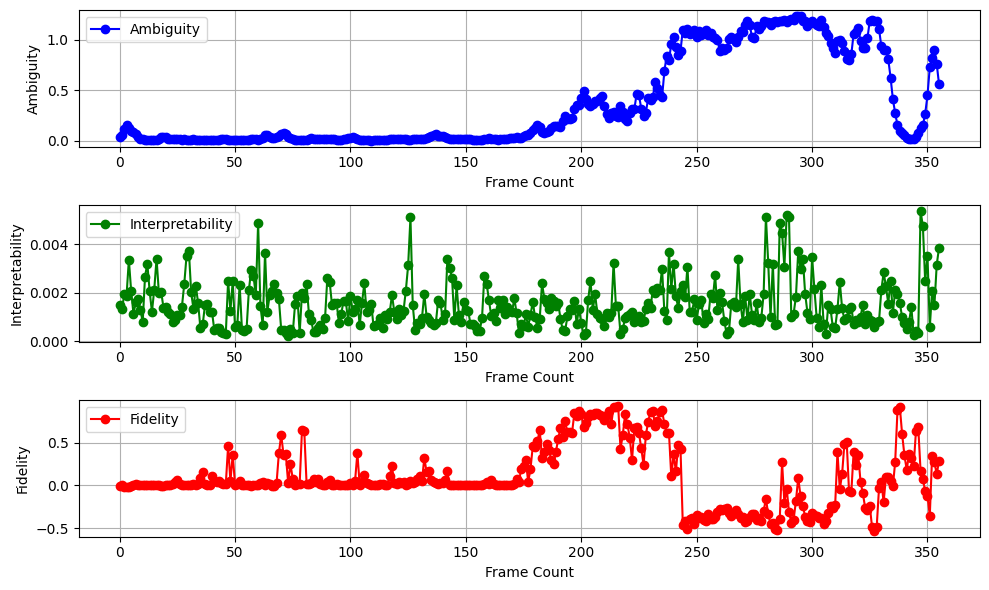


--- Average Metric Values ---
Average Ambiguity: 0.3656
Average Interpretability: 0.0015
Average Fidelity: 0.0962
Video saved at: Z:\activity recognition\test_videos/😯Most punches in 12 second 😯 #viral #punching-Output-SeqLen20.mp4


In [26]:
# Construct the output video path.
output_video_file_path = f'{test_videos_directory}/{video_title}-Output-SeqLen{SEQUENCE_LENGTH}.mp4'

# Perform Action Recognition on the Test Video.
predict_on_video(input_video_file_path, output_video_file_path, SEQUENCE_LENGTH)


In [33]:
#gradcam Output

Video opened: Z:\activity recognition\test_videos/😯Most punches in 12 second 😯 #viral #punching.mp4
1/1 [==============================] - 0s 39ms/step
No more frames or error reading frame.


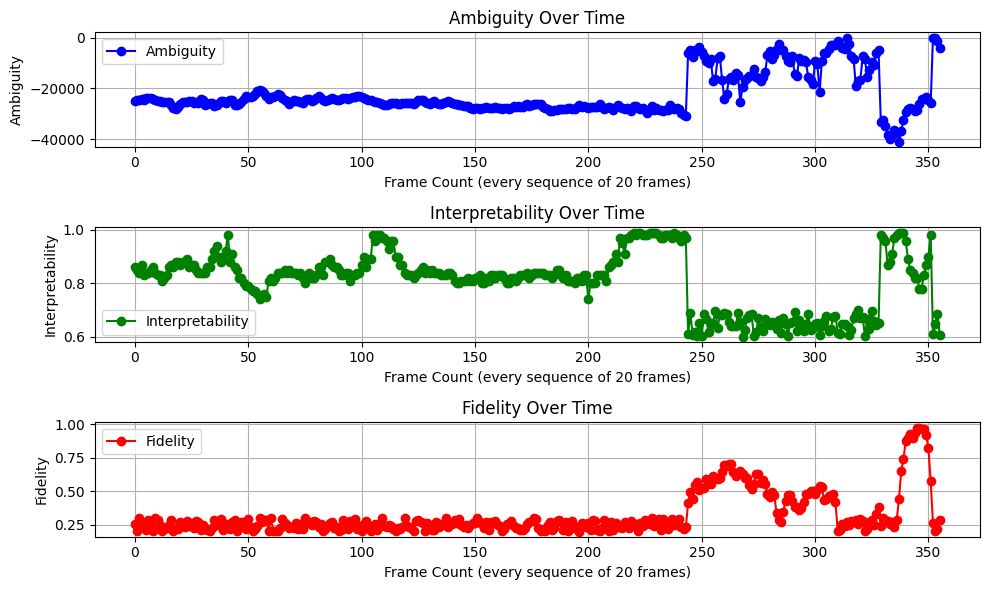


--- Average Metric Values ---
Average Ambiguity: -22399.9706
Average Interpretability: 0.8095
Average Fidelity: 0.3236
Video saved at: Z:\activity recognition\test_videos/😯Most punches in 12 second 😯 #viral #punching-Output-SeqLen20.mp4


In [19]:
# Construct the output video path.
output_video_file_path = f'{test_videos_directory}/{video_title}-Output-SeqLen{SEQUENCE_LENGTH}.mp4'

predict_on_video(input_video_file_path, output_video_file_path, SEQUENCE_LENGTH)
